In [1]:
# import os
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# def read_lines(file_path):
#     with open(file_path, 'r') as f:
#         lines = [line.strip() for line in f if line.strip()]
#     return lines

# def compute_bleu(reference_file, prediction_file):
#     references = read_lines(reference_file)
#     predictions = read_lines(prediction_file)
    
#     assert len(references) == len(predictions), f"Line count mismatch: {reference_file} vs {prediction_file}"

#     smoothie = SmoothingFunction().method4
#     scores = []

#     for ref, pred in zip(references, predictions):
#         ref_tokens = ref.split()
#         pred_tokens = pred.split()
#         score = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)
#         scores.append(score)

#     return sum(scores) / len(scores)

# # Directory path
# folder = 'text/'
# bleu_scores = []

# # Scan folder for matching file pairs
# for filename in os.listdir(folder):
#     if filename.endswith('_answer.txt'):
#         base = filename.replace('_answer.txt', '')
#         pred_file = os.path.join(folder, f'{base}_pred.txt')
#         answer_file = os.path.join(folder, filename)

#         if os.path.exists(pred_file):
#             try:
#                 score = compute_bleu(answer_file, pred_file)
#                 bleu_scores.append((base, score))
#                 print(f"{base}: BLEU = {score:.4f}")
#             except Exception as e:
#                 print(f"Error processing {base}: {e}")
#         else:
#             print(f"Missing prediction file for {base}")

# # Compute average BLEU
# if bleu_scores:
#     avg_bleu = sum(score for _, score in bleu_scores) / len(bleu_scores)
#     print(f"\nAverage BLEU score across {len(bleu_scores)} files: {avg_bleu:.4f}")
# else:
#     print("No BLEU scores computed.")


In [2]:
# RESULTS_ZIP_FILE = "../../results/synthBootstrap/synthBootstrap_mini.zip"
# RESULTS_FOLDER_DESTINATION = "../../results/synthBootstrap"

In [1]:
# import os
# from send2trash import send2trash

# specific_FOLDER = "text"

# files_to_delete = [
#     f for f in os.listdir(specific_FOLDER)
#     if f.endswith(".json") or f.endswith("_pred_processed.html") or f.endswith("_answer_processed.html")
# ]

# for filename in files_to_delete:
#     file_path = os.path.join(specific_FOLDER, filename)
#     try:
#         send2trash(file_path)
#         print(f"Moved to trash: {file_path}")
#     except PermissionError:
#         print(f"No permission to use trash, deleting: {file_path}")
#         os.remove(file_path)


# import os
# import re

# # Define the directory where the files are stored
# folder = "text"  # change this to your target directory

# # Define the regex pattern to match all relevant files
# pattern = re.compile(r"rw_\d+_(answer_processed|gradient_map|pred_processed|ssim_map)\.png")

# # Delete matching files
# for filename in os.listdir(folder):
#     if pattern.fullmatch(filename):
#         filepath = os.path.join(folder, filename)
#         os.remove(filepath)
#         print(f"Deleted: {filepath}")


In [1]:
import os
RESULTS_FOLDER = "text_pix2code" #
list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

352

In [2]:
%run utils/postprocessing_fixed.py --folder text_pix2code --suffix .txt

100%|██████████| 352/352 [00:03<00:00, 94.03it/s] 


In [3]:
%run utils/extract_screenshots --folder text_pix2code --webGenerator

css_folder_path:  /
Using Chrome binary at: /mnt/ffs24/home/seyeon/chrome-linux64/chrome


100%|██████████| 352/352 [01:15<00:00,  4.68it/s]

Generated 352 PNG files in 75.1 seconds. Files are in /.


In [5]:
# NOTE: this was run from command line to use multiprocessing
%run utils/calculate_metrics --folder text_pix2code

Number of files: 176


  0%|          | 0/176 [00:00<?, ?it/s]/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_node in soup.find_all(text=True):
/mnt/ffs24/home/seyeon/utils/calculate_metrics.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for text_

   Avg Edit Distance = 877.716
             Avg Bleu Score = 0.802
Avg HTML Tree Edit Distance = 9.386
             Avg SSIM index = 0.625
/nExecution time: 312.244247674942


In [6]:
import pandas as pd
import os
import json

RESULTS_FOLDER = "text_pix2code"  # <--- Make sure this matches your actual folder

# Load all json files
all_json_files = [os.path.join(RESULTS_FOLDER, file) for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print(f"{file_path}: {data}")  # <--- Add this for debug
    dataframes.append(pd.DataFrame([data]))

df = pd.concat(dataframes, ignore_index=True)
print(df)


text_pix2code/00150311-A7AE-4804-8B7D-9273687B4FC0.json: {'errors': ['/bin/sh: 1: tidy: not found'], 'len_pred': 3249, 'len_answer': 3359, 'max_len': 3359, 'bleu': 0.8602668050945946, 'ed': 1616, 'n_ed': 0.5806683435141933, 'ssim_index': 0.6889399510969515, 's_bleu': 0.9326030477928497, 'ted': 11.0, 'n_ted': 0.22}
text_pix2code/00CDC9A8-3D73-4291-90EF-49178E408797.json: {'errors': ['/bin/sh: 1: tidy: not found'], 'len_pred': 3032, 'len_answer': 3170, 'max_len': 3170, 'bleu': 0.8564196542992163, 'ed': 512, 'n_ed': 0.1997658993367148, 'ssim_index': 0.6076174066738322, 's_bleu': 0.9642522822151128, 'ted': 6.0, 'n_ted': 0.12}
text_pix2code/01B6145F-B88B-4FF8-B7D7-BB8A321EDA85.json: {'errors': ['/bin/sh: 1: tidy: not found'], 'len_pred': 2434, 'len_answer': 2246, 'max_len': 2434, 'bleu': 0.8494901515751733, 'ed': 386, 'n_ed': 0.18977384464110128, 'ssim_index': 0.648524721109842, 's_bleu': 0.8742835644166518, 'ted': 7.0, 'n_ted': 0.18421052631578946}
text_pix2code/020BDFEE-DA74-4EB0-BF6A-5D2

In [7]:
# !python3 postprocessing_fixed --folder text --suffix .txt --pix2code


In [8]:
# all_json_files

In [9]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [10]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,similarity_index,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,2997.102273,3245.204545,3303.119318,0.802077,877.715909,0.315019,0.624895,0.898953,9.386364,0.182747
std,402.855112,571.166959,507.464580,0.064541,460.190990,0.145540,0.035279,0.065984,4.649871,0.082384
min,2165.000000,1845.000000,2166.000000,0.558867,207.000000,0.112868,0.483532,0.677823,0.000000,0.000000
25%,2715.500000,2804.000000,2956.250000,0.771559,590.250000,0.221049,0.603217,0.862969,6.000000,0.129040
50%,3048.000000,3432.000000,3494.000000,0.813461,753.500000,0.266760,0.623915,0.914106,9.500000,0.181818
75%,3268.250000,3684.500000,3684.500000,0.844990,1054.750000,0.347832,0.650925,0.945068,12.000000,0.231900
max,3624.000000,4567.000000,4567.000000,0.901017,1854.000000,0.676377,0.705753,0.990622,26.000000,0.434783


In [ ]:
	prediction_length	answer_length	max_length	BLEU_score	edit_distance	normalized_edit_distance	similarity_index	structural_BLEU_score	HTML_tree_edit_distance	normalized_HTML_tree_edit_distance
count	176.000000	176.000000	176.000000	176.000000	176.000000	176.000000	176.000000	176.000000	176.000000	176.000000
mean	2997.102273	3245.204545	3303.119318	0.802077	877.715909	0.315019	0.624895	0.898953	9.386364	0.182747
std	402.855112	571.166959	507.464580	0.064541	460.190990	0.145540	0.035279	0.065984	4.649871	0.082384
min	2165.000000	1845.000000	2166.000000	0.558867	207.000000	0.112868	0.483532	0.677823	0.000000	0.000000
25%	2715.500000	2804.000000	2956.250000	0.771559	590.250000	0.221049	0.603217	0.862969	6.000000	0.129040
50%	3048.000000	3432.000000	3494.000000	0.813461	753.500000	0.266760	0.623915	0.914106	9.500000	0.181818
75%	3268.250000	3684.500000	3684.500000	0.844990	1054.750000	0.347832	0.650925	0.945068	12.000000	0.231900
max	3624.000000	4567.000000	4567.000000	0.901017	1854.000000	0.676377	0.705753	0.990622	26.000000	0.434783

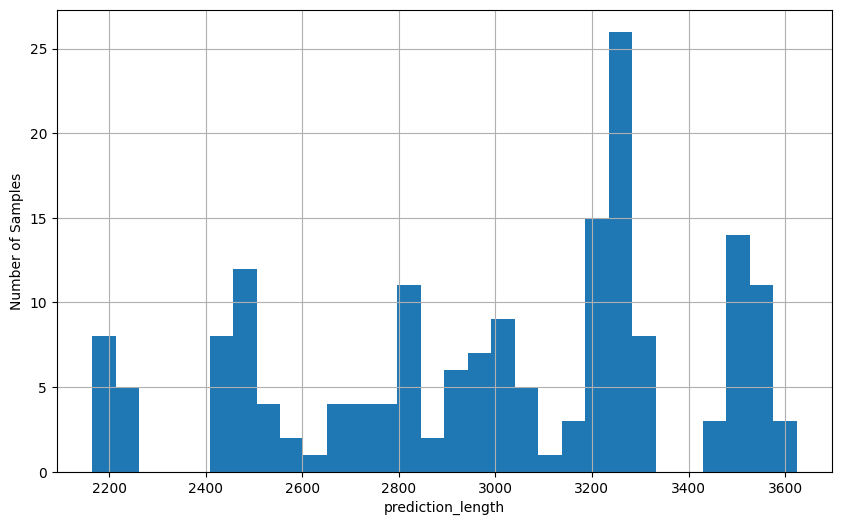

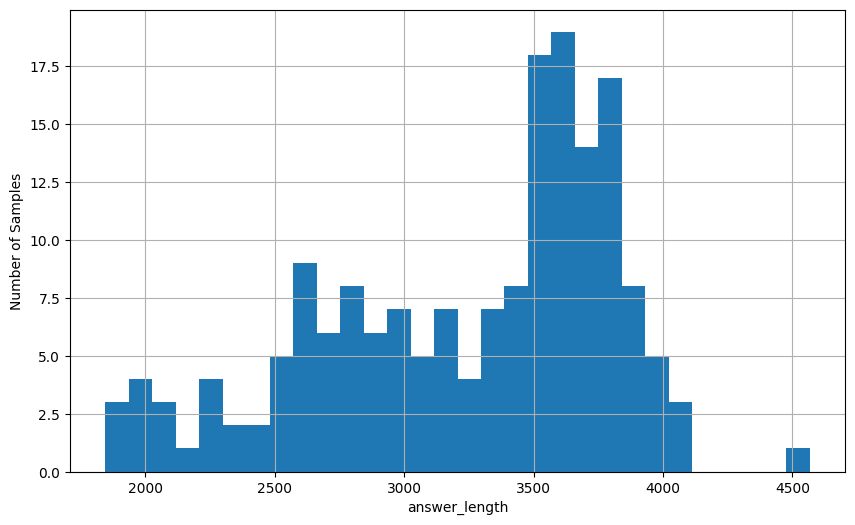

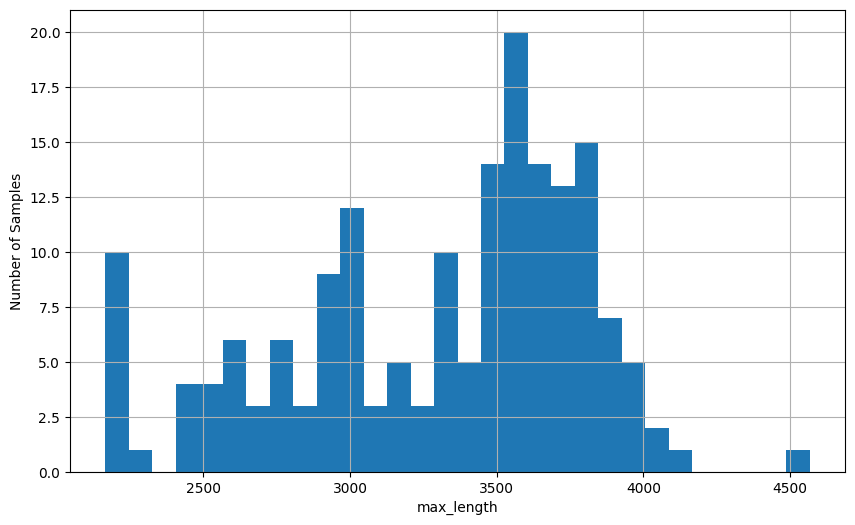

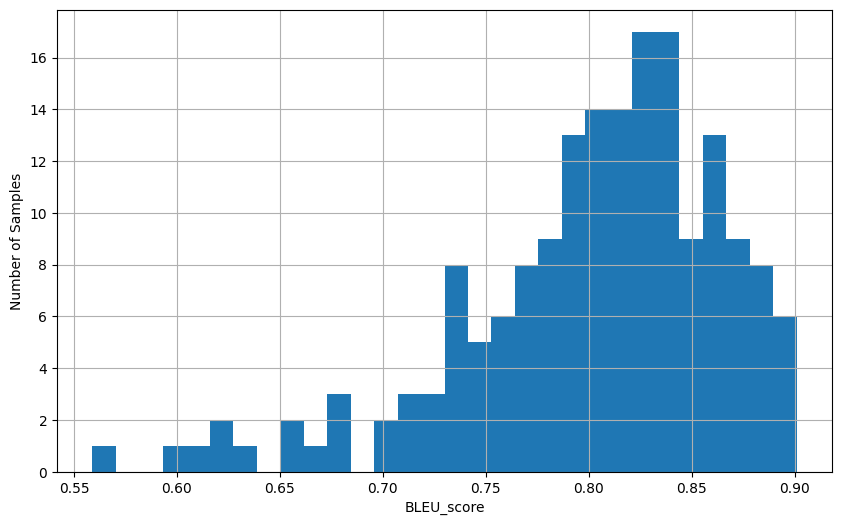

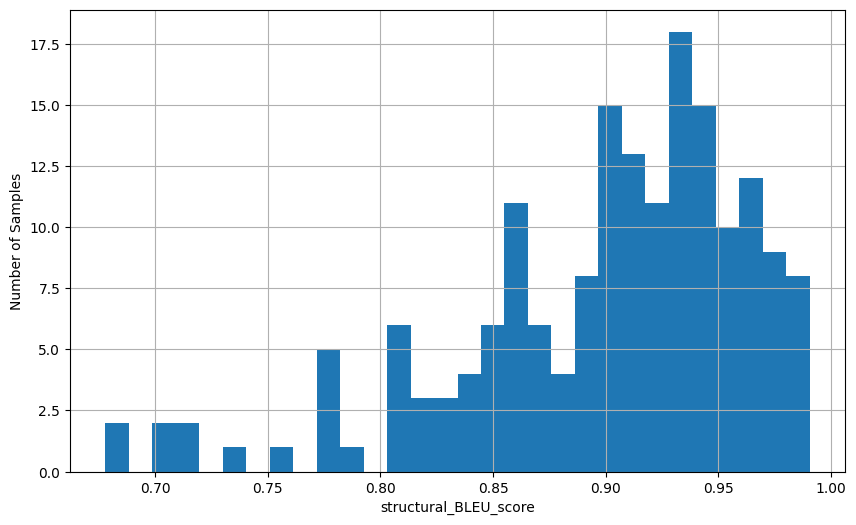

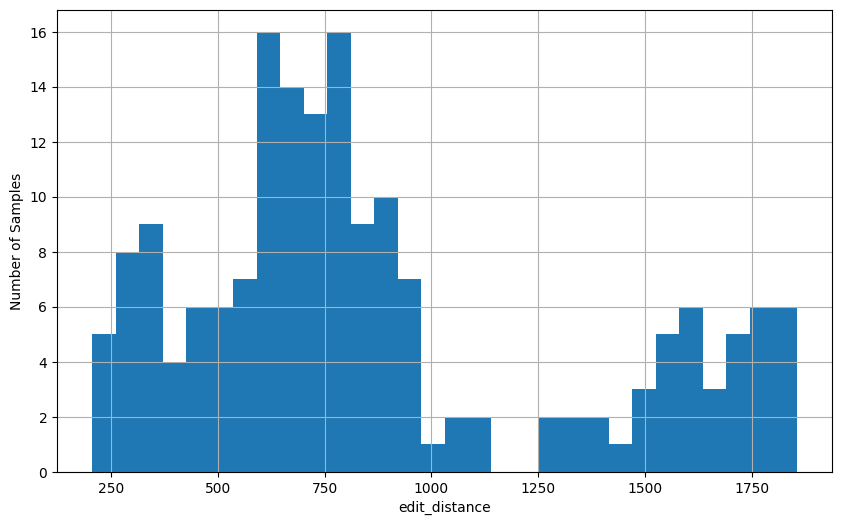

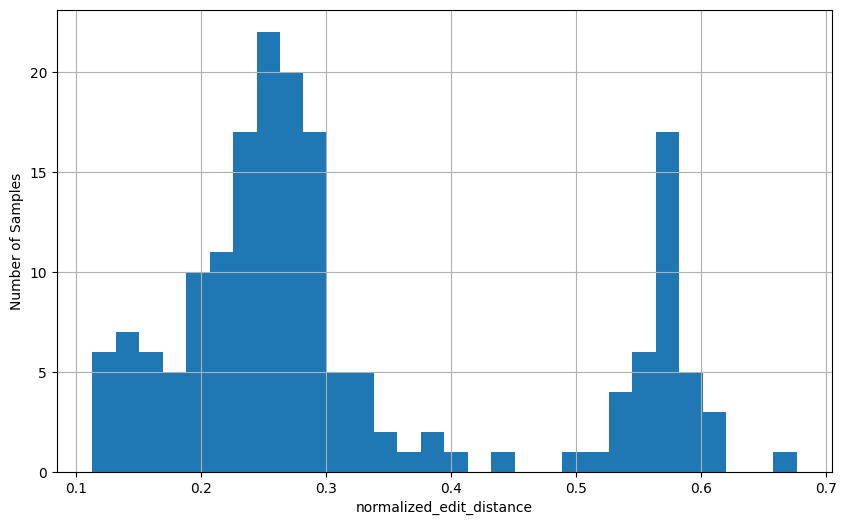

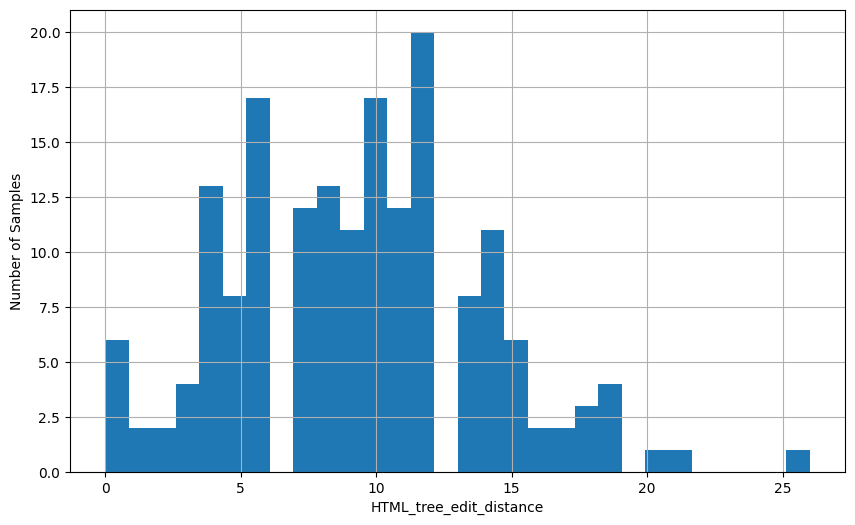

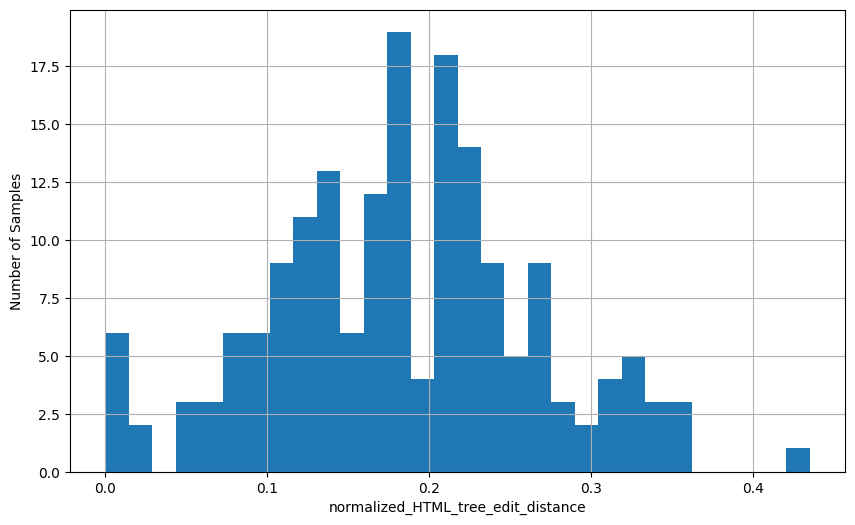

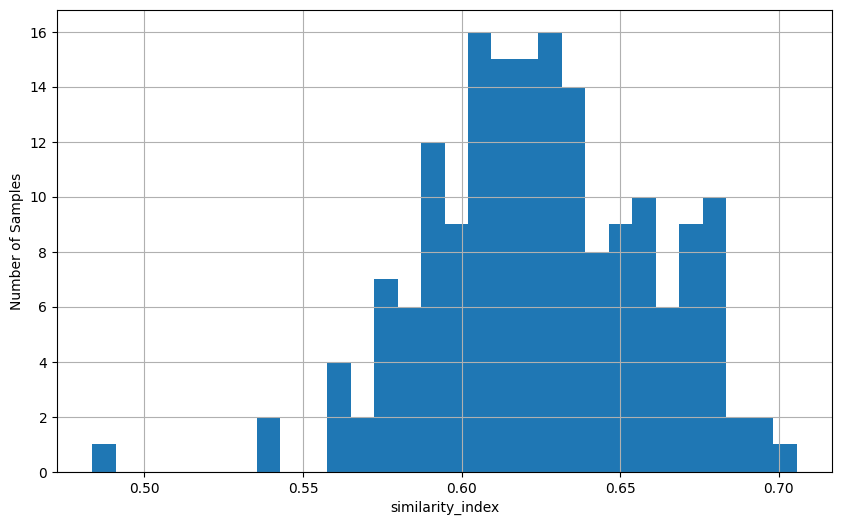

In [11]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


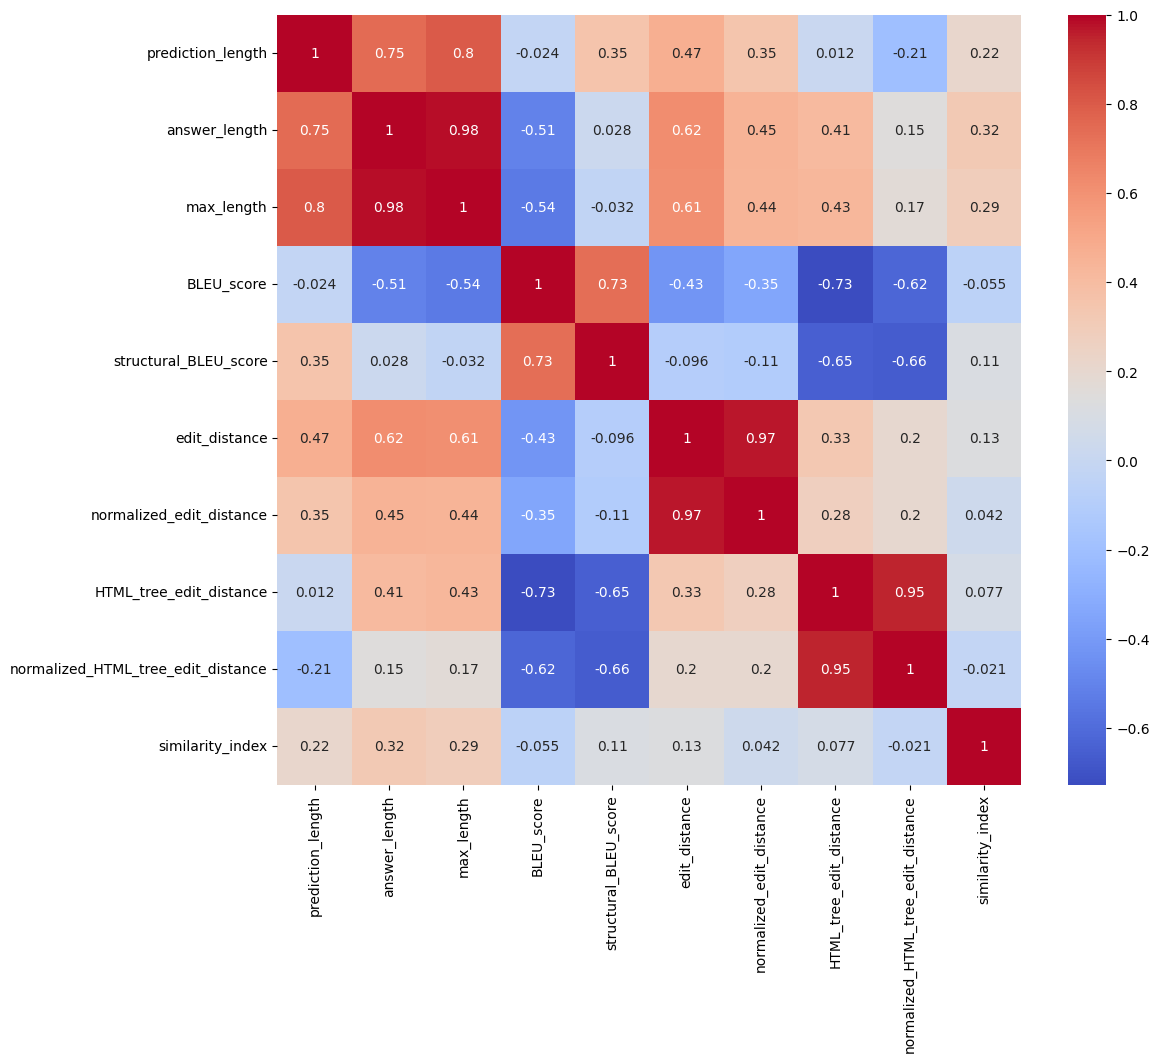

In [12]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

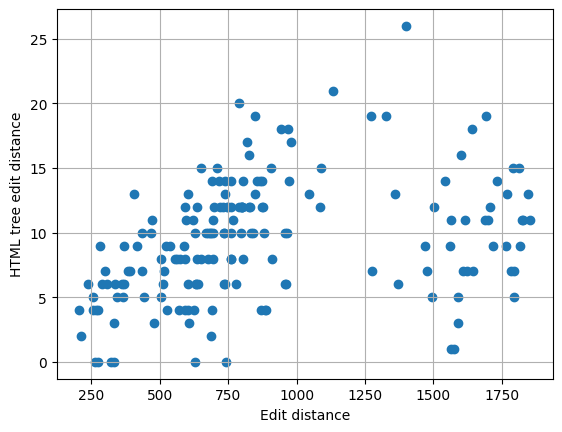

In [13]:
plt.scatter(df["edit_distance"], df["HTML_tree_edit_distance"])
#plt.title("Edit distance vs HTML tree edit distance")
plt.xlabel("Edit distance")
plt.ylabel("HTML tree edit distance")
plt.grid(True)
plt.show()


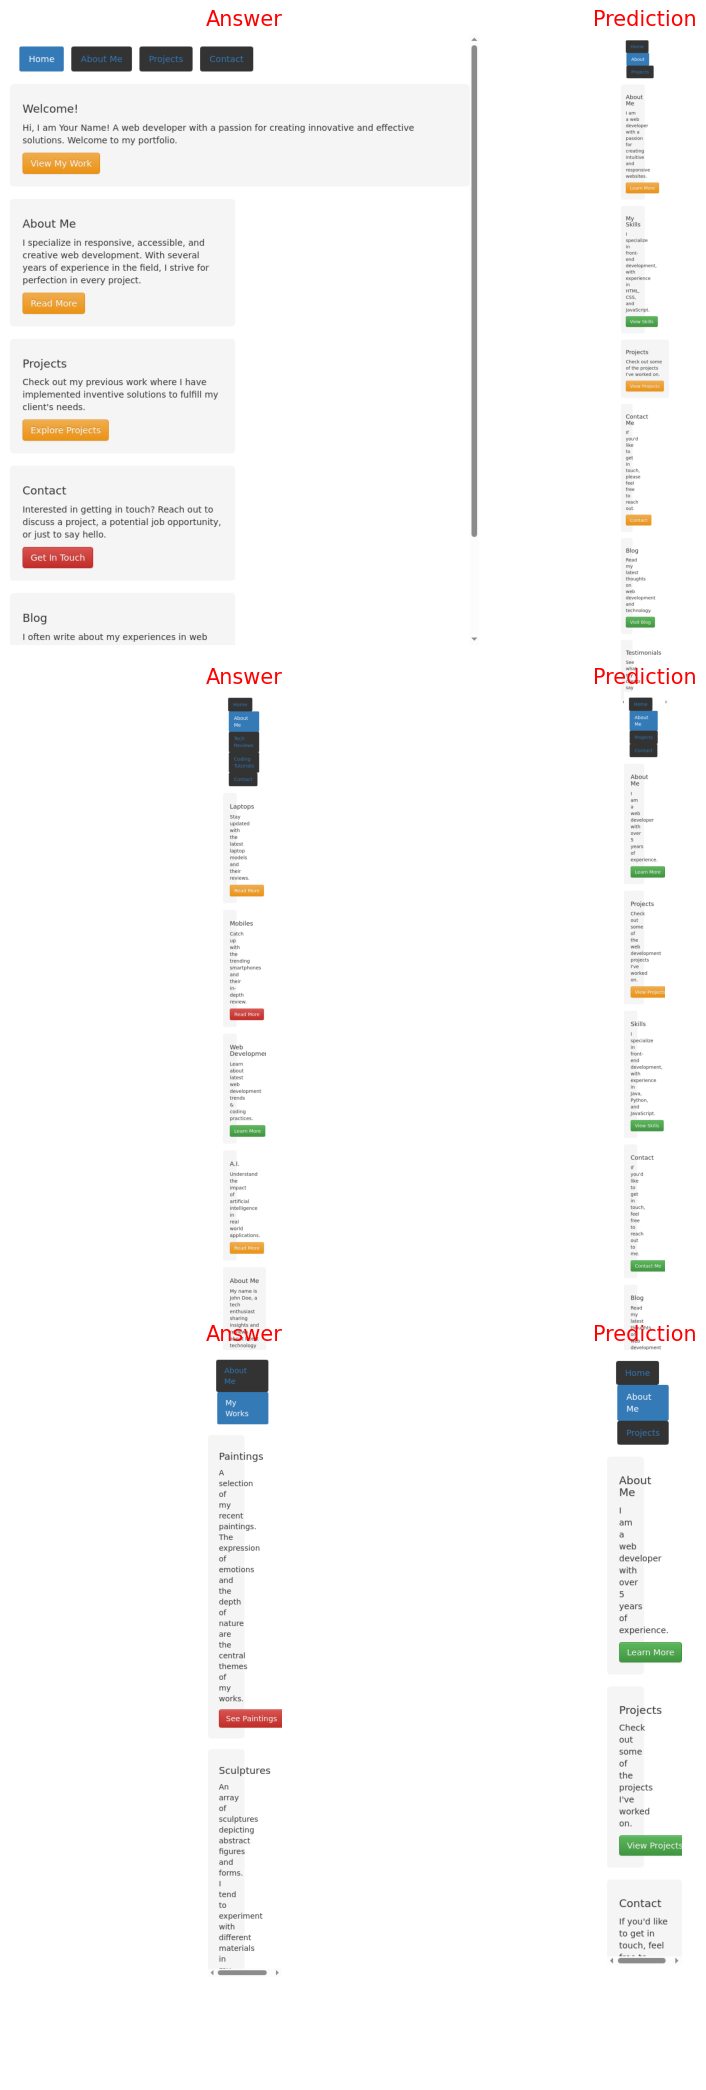

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 3

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(10, NUMBER_DISPLAYED*7))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()
